In [1]:
#Imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D 
from keras.layers import TimeDistributed
from keras.layers import Dropout
from keras.layers import LSTM

In [2]:
#Preprocessing the dataframe for training after extracting it from csv file
datasets = []
cgm_data = []

import os
path = "/Users/shreyaananth/Desktop/College/CIP/Code/Data/563/Train/Date"
for file in os.listdir(path):
    if file==".DS_Store":
        continue
    full_path = os.path.join(path,file)
    df = pd.read_csv(full_path, index_col=0)
    df.drop(columns='date',inplace=True)
    df.drop(columns='time',inplace=True)
    df.drop(columns='meal_type',inplace=True)
    cgm = np.array(df['cgm'])
    bas = np.array(df['bas'])
    bol = np.array(df['bol'])
    meal_carb = np.array(df['meal_carb'])
    cgm = cgm.reshape((len(cgm),1))
    bas = bas.reshape((len(bas), 1))
    bol = bol.reshape((len(bol), 1))
    meal_carb = meal_carb.reshape((len(meal_carb), 1))
    dataset = np.hstack((bas,bol,meal_carb,cgm))
    cgm = cgm[1:]
    dataset = dataset[0:-1]
    shp = np.shape(dataset)
    dataset = dataset.reshape((shp[0], 1, 4, 1))
    datasets.append(dataset)
    cgm_data.append(cgm)

In [3]:
#Creating CRNN Model
model = Sequential()
model.add(Conv2D(8, kernel_size=(12,12), padding='same',activation="relu", input_shape = (1,4,1)))
model.add(MaxPooling2D(1))
model.add(Conv2D(7, kernel_size=(16,6), padding='same',activation="relu"))
model.add(MaxPooling2D(1))
model.add(Conv2D(5, kernel_size=(8,8), padding='same',activation="relu"))
model.add(MaxPooling2D(1))
model.add(Dropout(0.2))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(68, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [4]:
#Training the dataset for 250 epochs
for j in range(250):
    print("Epoch ",j)
    for i in range(len(datasets)):
        model.fit(datasets[i], cgm_data[i], epochs=1)

Epoch  0


2022-06-02 11:02:55.285963: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 0s 2ms/step - loss: 910.2279
Epoch  1
9/9 [==============================] - 0s 2ms/step - loss: 350.6992
Epoch  2
9/9 [==============================] - 0s 2ms/step - loss: 309.4483
Epoch  3
9/9 [==============================] - 0s 2ms/step - loss: 217.5832
Epoch  4
9/9 [==============================] - 0s 2ms/step - loss: 249.7276
Epoch  5
9/9 [==============================] - 0s 2ms/step - loss: 242.1374


9/9 [==============================] - 0s 2ms/step - loss: 246.4380
Epoch  6
9/9 [==============================] - 0s 2ms/step - loss: 228.3456
Epoch  7
9/9 [==============================] - 0s 2ms/step - loss: 199.0580
Epoch  8
9/9 [==============================] - 0s 2ms/step - loss: 185.2283
Epoch  9
9/9 [==============================] - 0s 2ms/step - loss: 172.9190
Epoch  10
8/8 [==============================] - 0s 2ms/step - loss: 540.9736


9/9 [==============================] - 0s 2ms/step - loss: 143.4349
Epoch  11
9/9 [==============================] - 0s 2ms/step - loss: 144.0585
Epoch  12
9/9 [==============================] - 0s 2ms/step - loss: 120.9181
Epoch  13
9/9 [==============================] - 0s 2ms/step - loss: 133.6636
Epoch  14
9/9 [==============================] - 0s 2ms/step - loss: 116.5972
Epoch  15
9/9 [==============================] - 0s 2ms/step - loss: 116.2111


9/9 [==============================] - 0s 2ms/step - loss: 101.1244
Epoch  16
9/9 [==============================] - 0s 2ms/step - loss: 119.9687
Epoch  17
9/9 [==============================] - 0s 2ms/step - loss: 125.4122
Epoch  18
9/9 [==============================] - 0s 2ms/step - loss: 110.2712
Epoch  19
9/9 [==============================] - 0s 2ms/step - loss: 125.6331
Epoch  20
8/8 [==============================] - 0s 2ms/step - loss: 125.0044


9/9 [==============================] - 0s 2ms/step - loss: 140.2400
Epoch  21
9/9 [==============================] - 0s 2ms/step - loss: 141.5680
Epoch  22
9/9 [==============================] - 0s 2ms/step - loss: 114.5195
Epoch  23
9/9 [==============================] - 0s 2ms/step - loss: 127.4665
Epoch  24
9/9 [==============================] - 0s 2ms/step - loss: 115.2360
Epoch  25
9/9 [==============================] - 0s 2ms/step - loss: 110.1589
Epoch  26
9/9 [==============================] - 0s 2ms/step - loss: 122.1235


9/9 [==============================] - 0s 2ms/step - loss: 134.1415
Epoch  27
9/9 [==============================] - 0s 2ms/step - loss: 118.0940
Epoch  28
9/9 [==============================] - 0s 2ms/step - loss: 102.6105
Epoch  29
9/9 [==============================] - 0s 2ms/step - loss: 118.0445
Epoch  30
9/9 [==============================] - 0s 2ms/step - loss: 111.8442
Epoch  31
9/9 [==============================] - 0s 2ms/step - loss: 201.7295


9/9 [==============================] - 0s 2ms/step - loss: 105.4471
Epoch  32
9/9 [==============================] - 0s 2ms/step - loss: 97.3943
Epoch  33
9/9 [==============================] - 0s 2ms/step - loss: 67.1747


9/9 [==============================] - 0s 2ms/step - loss: 103.2666
Epoch  34
9/9 [==============================] - 0s 2ms/step - loss: 92.7018
Epoch  35
9/9 [==============================] - 0s 2ms/step - loss: 105.4782
Epoch  36
9/9 [==============================] - 0s 2ms/step - loss: 87.3495
Epoch  37
9/9 [==============================] - 0s 2ms/step - loss: 102.9991
Epoch  38
9/9 [==============================] - 0s 2ms/step - loss: 102.9629
Epoch  39
9/9 [==============================] - 0s 2ms/step - loss: 89.0730


9/9 [==============================] - 0s 2ms/step - loss: 106.3040
Epoch  40
9/9 [==============================] - 0s 2ms/step - loss: 87.1320
Epoch  41
9/9 [==============================] - 0s 2ms/step - loss: 80.6761
Epoch  42
9/9 [==============================] - 0s 2ms/step - loss: 83.4830
Epoch  43
9/9 [==============================] - 0s 2ms/step - loss: 70.7118
Epoch  44
8/8 [==============================] - 0s 2ms/step - loss: 379.8282


9/9 [==============================] - 0s 2ms/step - loss: 98.5376
Epoch  45
9/9 [==============================] - 0s 2ms/step - loss: 89.0626
Epoch  46
9/9 [==============================] - 0s 2ms/step - loss: 87.5687
Epoch  47
9/9 [==============================] - 0s 2ms/step - loss: 84.2800
Epoch  48
9/9 [==============================] - 0s 2ms/step - loss: 88.3310
Epoch  49
5/5 [==============================] - 0s 2ms/step - loss: 61.6393


9/9 [==============================] - 0s 2ms/step - loss: 88.7456
Epoch  50
9/9 [==============================] - 0s 2ms/step - loss: 69.0993
Epoch  51
9/9 [==============================] - 0s 2ms/step - loss: 69.5167
Epoch  52
9/9 [==============================] - 0s 2ms/step - loss: 84.7729
Epoch  53
9/9 [==============================] - 0s 2ms/step - loss: 75.7637
Epoch  54
8/8 [==============================] - 0s 2ms/step - loss: 52.8085


9/9 [==============================] - 0s 2ms/step - loss: 77.5362
Epoch  55
9/9 [==============================] - 0s 2ms/step - loss: 79.2325
Epoch  56
9/9 [==============================] - 0s 2ms/step - loss: 62.3886
Epoch  57
9/9 [==============================] - 0s 2ms/step - loss: 72.0735
Epoch  58
9/9 [==============================] - 0s 2ms/step - loss: 72.4351
Epoch  59
9/9 [==============================] - 0s 2ms/step - loss: 61.1436
Epoch  60
9/9 [==============================] - 0s 2ms/step - loss: 79.9769


9/9 [==============================] - 0s 2ms/step - loss: 64.0056
Epoch  61
9/9 [==============================] - 0s 2ms/step - loss: 62.7589
Epoch  62
9/9 [==============================] - 0s 2ms/step - loss: 57.9706
Epoch  63
9/9 [==============================] - 0s 2ms/step - loss: 52.9829
Epoch  64
9/9 [==============================] - 0s 2ms/step - loss: 68.4758
Epoch  65
8/8 [==============================] - 0s 2ms/step - loss: 334.5020


9/9 [==============================] - 0s 2ms/step - loss: 59.9487
Epoch  66
9/9 [==============================] - 0s 2ms/step - loss: 56.2786
Epoch  67
9/9 [==============================] - 0s 2ms/step - loss: 69.2788
Epoch  68
9/9 [==============================] - 0s 2ms/step - loss: 60.2943
Epoch  69
9/9 [==============================] - 0s 2ms/step - loss: 55.6091
Epoch  70
9/9 [==============================] - 0s 2ms/step - loss: 38.7125


9/9 [==============================] - 0s 2ms/step - loss: 54.1554
Epoch  71
9/9 [==============================] - 0s 2ms/step - loss: 58.0457
Epoch  72
9/9 [==============================] - 0s 2ms/step - loss: 54.2647
Epoch  73
9/9 [==============================] - 0s 2ms/step - loss: 55.9731
Epoch  74
9/9 [==============================] - 0s 2ms/step - loss: 55.1763
Epoch  75
9/9 [==============================] - 0s 2ms/step - loss: 91.3378


9/9 [==============================] - 0s 2ms/step - loss: 51.9449
Epoch  76
9/9 [==============================] - 0s 2ms/step - loss: 54.6956
Epoch  77
9/9 [==============================] - 0s 2ms/step - loss: 62.4532
Epoch  78
9/9 [==============================] - 0s 2ms/step - loss: 53.4688
Epoch  79
9/9 [==============================] - 0s 2ms/step - loss: 51.3229
Epoch  80
9/9 [==============================] - 0s 2ms/step - loss: 52.1767
Epoch  81
9/9 [==============================] - 0s 2ms/step - loss: 51.4416


9/9 [==============================] - 0s 2ms/step - loss: 61.6276
Epoch  82
9/9 [==============================] - 0s 2ms/step - loss: 57.0603
Epoch  83
9/9 [==============================] - 0s 2ms/step - loss: 48.5407
Epoch  84
9/9 [==============================] - 0s 2ms/step - loss: 50.0980
Epoch  85
9/9 [==============================] - 0s 2ms/step - loss: 46.7139
Epoch  86
9/9 [==============================] - 0s 2ms/step - loss: 82.9705


9/9 [==============================] - 0s 2ms/step - loss: 50.8788
Epoch  87
9/9 [==============================] - 0s 2ms/step - loss: 54.3433
Epoch  88
9/9 [==============================] - 0s 2ms/step - loss: 44.3452
Epoch  89
9/9 [==============================] - 0s 2ms/step - loss: 58.5496
Epoch  90
9/9 [==============================] - 0s 2ms/step - loss: 40.6048
Epoch  91
9/9 [==============================] - 0s 2ms/step - loss: 33.3764


9/9 [==============================] - 0s 2ms/step - loss: 38.8440
Epoch  92
9/9 [==============================] - 0s 2ms/step - loss: 49.1395
Epoch  93
9/9 [==============================] - 0s 2ms/step - loss: 40.8316
Epoch  94
9/9 [==============================] - 0s 2ms/step - loss: 45.4132
Epoch  95
9/9 [==============================] - 0s 2ms/step - loss: 43.2682
Epoch  96
9/9 [==============================] - 0s 2ms/step - loss: 44.3358
Epoch  97
9/9 [==============================] - 0s 2ms/step - loss: 58.0028


9/9 [==============================] - 0s 2ms/step - loss: 46.3807
Epoch  98
9/9 [==============================] - 0s 2ms/step - loss: 45.6169
Epoch  99
9/9 [==============================] - 0s 2ms/step - loss: 45.3116
Epoch  100
9/9 [==============================] - 0s 2ms/step - loss: 38.7455
Epoch  101
9/9 [==============================] - 0s 2ms/step - loss: 57.0569
Epoch  102
9/9 [==============================] - 0s 2ms/step - loss: 106.0790


9/9 [==============================] - 0s 2ms/step - loss: 43.1516
Epoch  103
9/9 [==============================] - 0s 2ms/step - loss: 40.9139
Epoch  104
9/9 [==============================] - 0s 2ms/step - loss: 36.4385
Epoch  105
9/9 [==============================] - 0s 2ms/step - loss: 43.3785
Epoch  106
9/9 [==============================] - 0s 2ms/step - loss: 40.5556
Epoch  107
5/5 [==============================] - 0s 2ms/step - loss: 40.8744


9/9 [==============================] - 0s 2ms/step - loss: 45.2393
Epoch  108
9/9 [==============================] - 0s 2ms/step - loss: 37.6901
Epoch  109
9/9 [==============================] - 0s 2ms/step - loss: 47.5895
Epoch  110
9/9 [==============================] - 0s 2ms/step - loss: 35.6897
Epoch  111
9/9 [==============================] - 0s 2ms/step - loss: 38.1027
Epoch  112
9/9 [==============================] - 0s 2ms/step - loss: 46.1720


9/9 [==============================] - 0s 2ms/step - loss: 38.0305
Epoch  113
9/9 [==============================] - 0s 2ms/step - loss: 39.4817
Epoch  114
9/9 [==============================] - 0s 2ms/step - loss: 45.4829
Epoch  115
9/9 [==============================] - 0s 2ms/step - loss: 47.6351
Epoch  116
9/9 [==============================] - 0s 2ms/step - loss: 45.2522
Epoch  117
9/9 [==============================] - 0s 2ms/step - loss: 38.2634
Epoch  118
9/9 [==============================] - 0s 2ms/step - loss: 50.7294


9/9 [==============================] - 0s 2ms/step - loss: 37.8720
Epoch  119
9/9 [==============================] - 0s 2ms/step - loss: 42.9939
Epoch  120
9/9 [==============================] - 0s 2ms/step - loss: 41.8472
Epoch  121
9/9 [==============================] - 0s 2ms/step - loss: 43.3959
Epoch  122
9/9 [==============================] - 0s 2ms/step - loss: 36.1921
Epoch  123
9/9 [==============================] - 0s 2ms/step - loss: 58.2041


9/9 [==============================] - 0s 2ms/step - loss: 47.3795
Epoch  124
9/9 [==============================] - 0s 2ms/step - loss: 46.5990
Epoch  125
9/9 [==============================] - 0s 2ms/step - loss: 35.0764
Epoch  126
9/9 [==============================] - 0s 2ms/step - loss: 44.7604
Epoch  127
9/9 [==============================] - 0s 2ms/step - loss: 47.9150
Epoch  128
9/9 [==============================] - 0s 2ms/step - loss: 40.6479


9/9 [==============================] - 0s 2ms/step - loss: 42.3966
Epoch  129
9/9 [==============================] - 0s 2ms/step - loss: 44.8962
Epoch  130
9/9 [==============================] - 0s 2ms/step - loss: 50.4245
Epoch  131
9/9 [==============================] - 0s 2ms/step - loss: 45.5128
Epoch  132
9/9 [==============================] - 0s 2ms/step - loss: 39.4298
Epoch  133
8/8 [==============================] - 0s 2ms/step - loss: 40.8373


9/9 [==============================] - 0s 2ms/step - loss: 37.9789
Epoch  134
9/9 [==============================] - 0s 2ms/step - loss: 37.5581
Epoch  135
9/9 [==============================] - 0s 2ms/step - loss: 39.3611
Epoch  136
9/9 [==============================] - 0s 2ms/step - loss: 38.1121
Epoch  137
9/9 [==============================] - 0s 2ms/step - loss: 36.5812
Epoch  138
9/9 [==============================] - 0s 2ms/step - loss: 36.1100
Epoch  139
9/9 [==============================] - 0s 2ms/step - loss: 26.0355


9/9 [==============================] - 0s 2ms/step - loss: 36.0200
Epoch  140
9/9 [==============================] - 0s 2ms/step - loss: 40.7389
Epoch  141
9/9 [==============================] - 0s 2ms/step - loss: 37.9077
Epoch  142
9/9 [==============================] - 0s 2ms/step - loss: 37.3878
Epoch  143
9/9 [==============================] - 0s 2ms/step - loss: 43.3044
Epoch  144
9/9 [==============================] - 0s 2ms/step - loss: 52.7522


9/9 [==============================] - 0s 2ms/step - loss: 36.2199
Epoch  145
9/9 [==============================] - 0s 2ms/step - loss: 32.8675
Epoch  146
9/9 [==============================] - 0s 2ms/step - loss: 40.8970
Epoch  147
9/9 [==============================] - 0s 2ms/step - loss: 38.5406
Epoch  148
9/9 [==============================] - 0s 2ms/step - loss: 30.9468
Epoch  149
9/9 [==============================] - 0s 2ms/step - loss: 45.6350


9/9 [==============================] - 0s 2ms/step - loss: 44.7864
Epoch  150
9/9 [==============================] - 0s 2ms/step - loss: 37.1290
Epoch  151
9/9 [==============================] - 0s 2ms/step - loss: 36.1495
Epoch  152
9/9 [==============================] - 0s 2ms/step - loss: 32.4336
Epoch  153
9/9 [==============================] - 0s 2ms/step - loss: 38.4894
Epoch  154
9/9 [==============================] - 0s 2ms/step - loss: 30.8543


9/9 [==============================] - 0s 2ms/step - loss: 31.4123
Epoch  155
9/9 [==============================] - 0s 2ms/step - loss: 38.1174
Epoch  156
9/9 [==============================] - 0s 2ms/step - loss: 31.3726
Epoch  157
9/9 [==============================] - 0s 2ms/step - loss: 34.9962
Epoch  158
9/9 [==============================] - 0s 2ms/step - loss: 31.7613
Epoch  159
9/9 [==============================] - 0s 2ms/step - loss: 34.7157
Epoch  160
9/9 [==============================] - 0s 2ms/step - loss: 41.3260


9/9 [==============================] - 0s 2ms/step - loss: 33.0118
Epoch  161
9/9 [==============================] - 0s 2ms/step - loss: 33.5149
Epoch  162
9/9 [==============================] - 0s 2ms/step - loss: 31.7871
Epoch  163
9/9 [==============================] - 0s 2ms/step - loss: 36.2775
Epoch  164
9/9 [==============================] - 0s 2ms/step - loss: 32.7822
Epoch  165
8/8 [==============================] - 0s 2ms/step - loss: 300.8193


9/9 [==============================] - 0s 2ms/step - loss: 40.3125
Epoch  166
9/9 [==============================] - 0s 2ms/step - loss: 36.6516
Epoch  167
9/9 [==============================] - 0s 2ms/step - loss: 32.5229
Epoch  168
9/9 [==============================] - 0s 2ms/step - loss: 37.5691
Epoch  169
9/9 [==============================] - 0s 2ms/step - loss: 35.9630
Epoch  170
5/5 [==============================] - 0s 2ms/step - loss: 28.0514


9/9 [==============================] - 0s 2ms/step - loss: 34.5772
Epoch  171
9/9 [==============================] - 0s 2ms/step - loss: 41.6579
Epoch  172
9/9 [==============================] - 0s 2ms/step - loss: 36.8896
Epoch  173
9/9 [==============================] - 0s 2ms/step - loss: 37.1171
Epoch  174
9/9 [==============================] - 0s 2ms/step - loss: 32.4021
Epoch  175
8/8 [==============================] - 0s 2ms/step - loss: 30.9026


9/9 [==============================] - 0s 2ms/step - loss: 32.7260
Epoch  176
9/9 [==============================] - 0s 2ms/step - loss: 38.1184
Epoch  177
9/9 [==============================] - 0s 2ms/step - loss: 33.2738
Epoch  178
9/9 [==============================] - 0s 2ms/step - loss: 32.3149
Epoch  179
9/9 [==============================] - 0s 2ms/step - loss: 35.6030
Epoch  180
9/9 [==============================] - 0s 2ms/step - loss: 41.0655
Epoch  181
9/9 [==============================] - 0s 2ms/step - loss: 45.4085


9/9 [==============================] - 0s 2ms/step - loss: 29.9273
Epoch  182
9/9 [==============================] - 0s 2ms/step - loss: 30.5066
Epoch  183
9/9 [==============================] - 0s 2ms/step - loss: 34.9846
Epoch  184
9/9 [==============================] - 0s 2ms/step - loss: 33.8227
Epoch  185
9/9 [==============================] - 0s 2ms/step - loss: 34.1327
Epoch  186
8/8 [==============================] - 0s 2ms/step - loss: 170.9373


9/9 [==============================] - 0s 2ms/step - loss: 35.1280
Epoch  187
9/9 [==============================] - 0s 2ms/step - loss: 29.9890
Epoch  188
9/9 [==============================] - 0s 2ms/step - loss: 36.7387
Epoch  189
9/9 [==============================] - 0s 2ms/step - loss: 34.6673
Epoch  190
9/9 [==============================] - 0s 2ms/step - loss: 38.8851
Epoch  191
9/9 [==============================] - 0s 2ms/step - loss: 29.3232


9/9 [==============================] - 0s 2ms/step - loss: 37.9888
Epoch  192
9/9 [==============================] - 0s 2ms/step - loss: 28.8598
Epoch  193
9/9 [==============================] - 0s 2ms/step - loss: 32.8457
Epoch  194
9/9 [==============================] - 0s 2ms/step - loss: 33.5544
Epoch  195
9/9 [==============================] - 0s 2ms/step - loss: 31.3585
Epoch  196
9/9 [==============================] - 0s 2ms/step - loss: 52.4097


9/9 [==============================] - 0s 2ms/step - loss: 32.3446
Epoch  197
9/9 [==============================] - 0s 2ms/step - loss: 31.2280
Epoch  198
9/9 [==============================] - 0s 2ms/step - loss: 34.0019
Epoch  199
9/9 [==============================] - 0s 2ms/step - loss: 31.1940
Epoch  200
9/9 [==============================] - 0s 2ms/step - loss: 25.9222
Epoch  201
9/9 [==============================] - 0s 2ms/step - loss: 39.1583
Epoch  202
9/9 [==============================] - 0s 2ms/step - loss: 28.4192


9/9 [==============================] - 0s 2ms/step - loss: 34.4266
Epoch  203
9/9 [==============================] - 0s 2ms/step - loss: 31.9561
Epoch  204
9/9 [==============================] - 0s 2ms/step - loss: 33.7773
Epoch  205
9/9 [==============================] - 0s 2ms/step - loss: 31.8499
Epoch  206
9/9 [==============================] - 0s 2ms/step - loss: 34.1039
Epoch  207
9/9 [==============================] - 0s 2ms/step - loss: 62.3336


9/9 [==============================] - 0s 2ms/step - loss: 36.9845
Epoch  208
9/9 [==============================] - 0s 2ms/step - loss: 28.5203
Epoch  209
9/9 [==============================] - 0s 2ms/step - loss: 30.0690
Epoch  210
9/9 [==============================] - 0s 2ms/step - loss: 34.3581
Epoch  211
9/9 [==============================] - 0s 2ms/step - loss: 33.4438
Epoch  212
9/9 [==============================] - 0s 2ms/step - loss: 25.9595


9/9 [==============================] - 0s 2ms/step - loss: 32.3433
Epoch  213
9/9 [==============================] - 0s 2ms/step - loss: 27.5695
Epoch  214
9/9 [==============================] - 0s 2ms/step - loss: 31.2105
Epoch  215
9/9 [==============================] - 0s 2ms/step - loss: 29.8179
Epoch  216
9/9 [==============================] - 0s 2ms/step - loss: 33.5078
Epoch  217
9/9 [==============================] - 0s 2ms/step - loss: 29.5915
Epoch  218
9/9 [==============================] - 0s 2ms/step - loss: 41.8626


9/9 [==============================] - 0s 2ms/step - loss: 34.6096
Epoch  219
9/9 [==============================] - 0s 2ms/step - loss: 27.0897
Epoch  220
9/9 [==============================] - 0s 2ms/step - loss: 26.1282
Epoch  221
9/9 [==============================] - 0s 2ms/step - loss: 30.4906
Epoch  222
9/9 [==============================] - 0s 2ms/step - loss: 28.6007
Epoch  223
9/9 [==============================] - 0s 2ms/step - loss: 67.1901


9/9 [==============================] - 0s 2ms/step - loss: 32.6090
Epoch  224
9/9 [==============================] - 0s 2ms/step - loss: 30.8771
Epoch  225
9/9 [==============================] - 0s 2ms/step - loss: 29.4858
Epoch  226
9/9 [==============================] - 0s 2ms/step - loss: 30.3385
Epoch  227
9/9 [==============================] - 0s 2ms/step - loss: 28.8109
Epoch  228
5/5 [==============================] - 0s 2ms/step - loss: 27.4246


9/9 [==============================] - 0s 2ms/step - loss: 30.0863
Epoch  229
9/9 [==============================] - 0s 2ms/step - loss: 32.1730
Epoch  230
9/9 [==============================] - 0s 2ms/step - loss: 32.7877
Epoch  231
9/9 [==============================] - 0s 2ms/step - loss: 27.2107
Epoch  232
9/9 [==============================] - 0s 2ms/step - loss: 26.2545
Epoch  233
9/9 [==============================] - 0s 2ms/step - loss: 40.8427


9/9 [==============================] - 0s 2ms/step - loss: 26.3739
Epoch  234
9/9 [==============================] - 0s 2ms/step - loss: 28.2095
Epoch  235
9/9 [==============================] - 0s 2ms/step - loss: 32.1169
Epoch  236
9/9 [==============================] - 0s 2ms/step - loss: 33.4736
Epoch  237
9/9 [==============================] - 0s 2ms/step - loss: 34.4703
Epoch  238
9/9 [==============================] - 0s 2ms/step - loss: 25.3976
Epoch  239
9/9 [==============================] - 0s 2ms/step - loss: 29.6792


9/9 [==============================] - 0s 2ms/step - loss: 39.3572
Epoch  240
9/9 [==============================] - 0s 2ms/step - loss: 26.0969
Epoch  241
9/9 [==============================] - 0s 2ms/step - loss: 25.0755
Epoch  242
9/9 [==============================] - 0s 2ms/step - loss: 28.5426
Epoch  243
9/9 [==============================] - 0s 2ms/step - loss: 28.8130
Epoch  244
9/9 [==============================] - 0s 2ms/step - loss: 58.6906


9/9 [==============================] - 0s 2ms/step - loss: 32.9824
Epoch  245
9/9 [==============================] - 0s 2ms/step - loss: 32.1352
Epoch  246
9/9 [==============================] - 0s 2ms/step - loss: 31.2617
Epoch  247
9/9 [==============================] - 0s 2ms/step - loss: 28.4456
Epoch  248
9/9 [==============================] - 0s 2ms/step - loss: 40.8869
Epoch  249
9/9 [==============================] - 0s 2ms/step - loss: 35.7865


9/9 [==============================] - 0s 2ms/step - loss: 29.2270


In [38]:
#Getting the testing data
ts = pd.read_csv("/Users/shreyaananth/Desktop/College/CIP/Code/Data/563/Test/Date/date-2021-10-14.csv", index_col=0)

In [39]:
#Dropping irrelevent fields from test data
ts.drop(columns='date',inplace=True)
time = ts["time"]
time = time[0:12]
ts.drop(columns='time',inplace=True)
ts.drop(columns='meal_type',inplace=True)

In [40]:
#Preprocessing the test data
cgm = np.array(ts['cgm'])
bas = np.array(ts['bas'])
bol = np.array(ts['bol'])
meal_carb = np.array(ts['meal_carb'])
cgm = cgm.reshape((len(cgm),1))
bas = bas.reshape((len(bas), 1))
bol = bol.reshape((len(bol), 1))
meal_carb = meal_carb.reshape((len(meal_carb), 1))
ts = np.hstack((bas,bol,meal_carb,cgm))
cgm = cgm[1:]
ts = ts[0:-1]

In [41]:
shp = np.shape(ts)
ts = ts.reshape((shp[0], 1,  4,1))

In [42]:
ts = ts[0:12,:]

In [43]:
#Predicting data
y_pred = model.predict(ts, verbose=0)
y_pred = y_pred.reshape(len(y_pred))
cgm = cgm.reshape(len(cgm))
cgm = cgm[0:12]

In [44]:
y_pred = pd.DataFrame(list(y_pred))
cgm = pd.DataFrame(list(cgm))
print("Actual Predicted")
for i in range(len(cgm)):
    print(cgm[0][i], y_pred[0][i])

Actual Predicted
157 149.52818
157 149.52818
156 149.52818
157 148.79164
157 149.52818
156 149.52818
155 148.79164
158 148.04439
160 150.25629
160 151.82713
162 151.82713
163 154.05885


In [45]:
#Performance metrics
mse = mean_squared_error(y_pred, cgm)
rmse = math.sqrt(mse)
print("Value after 15 min (actual, predicted): ", cgm[0][2], y_pred[0][2])
print("Value after 60 min (actual, predicted): ", cgm[0][11], y_pred[0][11])
print("\nMean square error: ", mse)
print("Root mean square error: ", rmse)

Value after 15 min (actual, predicted):  156 149.52818
Value after 60 min (actual, predicted):  163 154.05885

Mean square error:  66.78792454401264
Root mean square error:  8.172387934013695


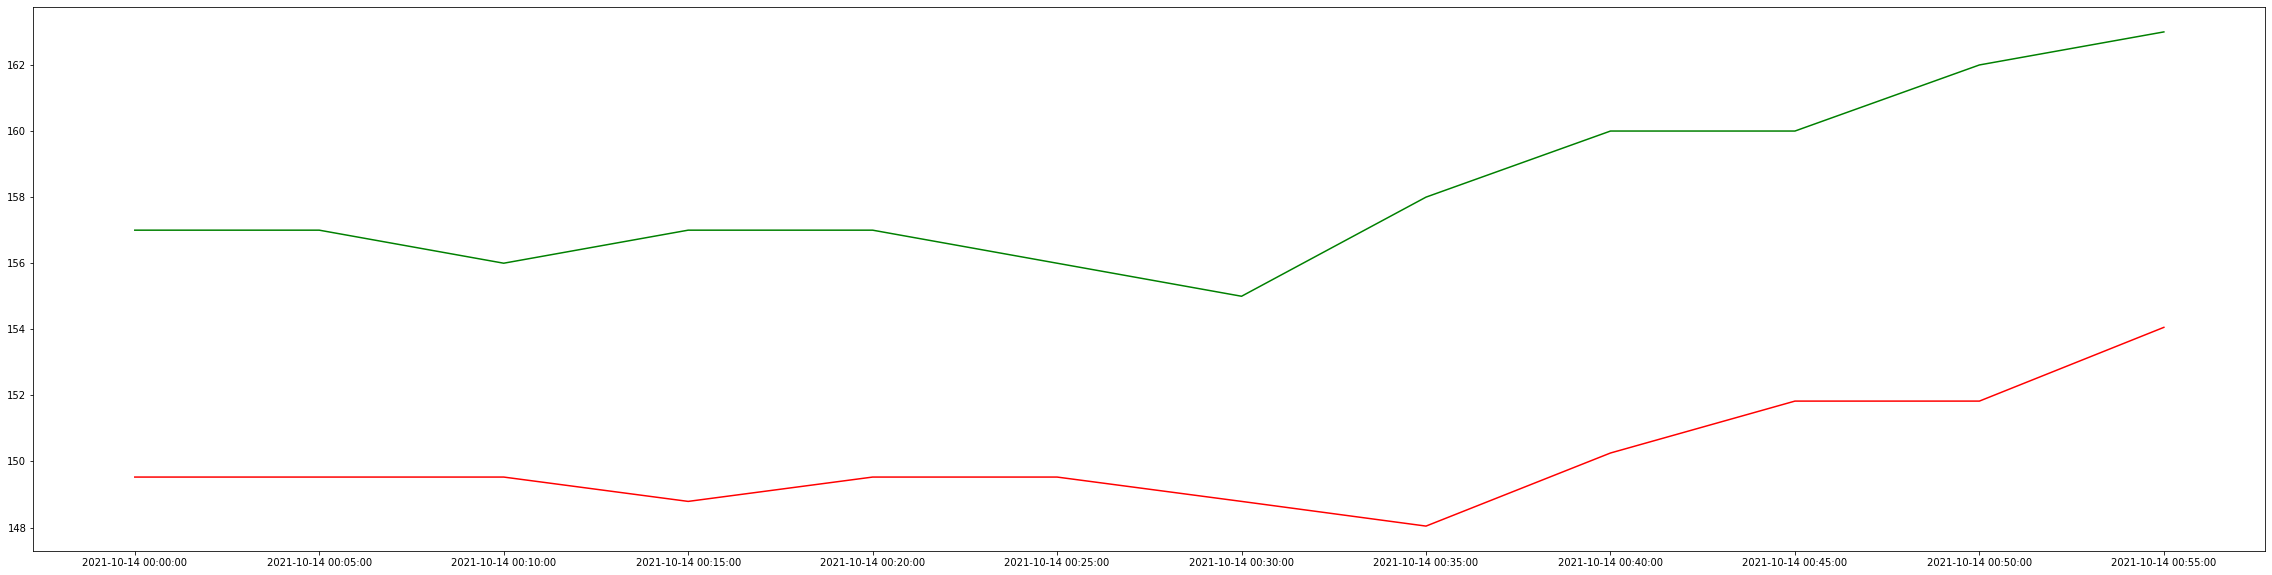

In [46]:
fig, plt1= plt.subplots()
fig.set_figwidth(40)
fig.set_figheight(10)
plt1.plot(time, cgm[0], color="green")
plt1.plot(time, y_pred[0], color="red")

In [47]:
import os
path = "/Users/shreyaananth/Desktop/College/CIP/Code/Data/563/Test/Date"
count = 0
mmse = 0
mrmse = 0

for file in os.listdir(path):
    if file==".DS_Store":
        continue
    count = count + 1
    full_path = os.path.join(path,file)
    ts = pd.read_csv(full_path, index_col=0)
    ts.drop(columns='date',inplace=True)
    time = ts["time"]
    time = time[0:-1]
    ts.drop(columns='time',inplace=True)
    ts.drop(columns='meal_type',inplace=True)
    cgm = np.array(ts['cgm'])
    bas = np.array(ts['bas'])
    bol = np.array(ts['bol'])
    meal_carb = np.array(ts['meal_carb'])
    cgm = cgm.reshape((len(cgm),1))
    bas = bas.reshape((len(bas), 1))
    bol = bol.reshape((len(bol), 1))
    meal_carb = meal_carb.reshape((len(meal_carb), 1))
    ts = np.hstack((bas,bol,meal_carb,cgm))
    cgm = cgm[1:]
    ts = ts[0:-1]
    shp = np.shape(ts)
    ts = ts.reshape((shp[0], 1,  4,1))
    ts = ts[0:12,:]
    cgm = cgm[0:12,:]
    y_pred = model.predict(ts, verbose=0)
    y_pred = y_pred.reshape(len(y_pred))
    cgm = cgm.reshape(len(cgm))
    mse = mean_squared_error(y_pred, cgm)
    mmse += mse
    mrmse += math.sqrt(mse)

In [48]:
mmse/=count
mrmse/=count
print("Performance on 60 minute prediction window: ")
print("Average mean squared error: ", mmse)
print("Average root mean squared error: ", mrmse)

Performance on 60 minute prediction window: 
Average mean squared error:  48.53038493989578
Average root mean squared error:  5.715923206498846
